In [65]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from numpy.linalg import inv as inverse

In [66]:
### constants
permittivity_ordinary = 2.356
permittivity_ext = 2.383

In [67]:
wavenumber = np.linspace(410, 600, 500)

omega_Tn_ord = np.array([393.5, 450.0, 695.0, 797.0, 1065.0, 1158.0])
gamma_Tn_ord = np.array([2.1, 4.5, 13.0, 6.9, 7.2, 9.3])

omega_Ln_ord = np.array([403.0, 507.0, 697.6, 810.0, 1226.0, 1155.0])
gamma_Ln_ord = np.array([2.8, 3.5, 13.0, 6.9, 12.5, 9.3])

omega_Tn_ext = np.array([363.5, 487.5, 777.0, 1071.0])
gamma_Tn_ext = np.array([4.8, 4.0, 6.7, 6.8])

omega_Ln_ext = np.array([386.7, 550.0, 790.0, 1229.0])
gamma_Ln_ext = np.array([7.0, 3.2, 6.7, 12.0])

In [68]:
results_ord = []
results_ext = []

for value in wavenumber:
    top_line = omega_Ln_ord**2 - value**2 - 1j * value * gamma_Ln_ord
    bottom_line =  omega_Tn_ord**2 - value**2 - 1j * value * gamma_Tn_ord
    result = top_line / bottom_line
    results_ord.append(permittivity_ordinary * np.prod(result))

    top_line = omega_Ln_ext**2 - value**2 - 1j * value * gamma_Ln_ext
    bottom_line =  omega_Tn_ext**2 - value**2 - 1j * value * gamma_Tn_ext
    result = top_line / bottom_line
    results_ext.append(permittivity_ext * np.prod(result))

In [69]:
E_zz = np.asarray(results_ord)
E_xx = np.asarray(results_ext)

def reflection_calculation(wavenumber, angle, E_xx, E_zz, prism_permittivity = 5.5, d = 1.5e-4):
    
    
    k0 = wavenumber * 2.0 * np.pi
    kx = k0 * np.sqrt(prism_permittivity) * np.sin(angle)
    kz1 = np.sqrt((prism_permittivity * k0**2) - kx**2 + 0j)
    kz2 = np.sqrt(k0**2. - kx**2. + 0j)
    kz3 = np.sqrt(((k0**2) * E_xx) - ((kx**2.) * E_xx/E_zz))
    kz3*= np.where(np.imag(kz3) < 0., -1., 1.)

    A11 = -np.exp( 1.j * kz1 * d)
    A12 =  np.exp(-1.j * kz2 * d)
    A13 =  np.exp( 1.j * kz2 * d)
    A14 =  0.
    
    A21 =  kz1 * np.exp( 1.j * kz1 * d) 
    A22 =  kz2 * np.exp(-1.j * kz2 * d) * prism_permittivity
    A23 = -kz2 * np.exp( 1.j * kz2 * d) * prism_permittivity  
    A24 =  0.
    
    A31 =  0.
    A32 =  1.
    A33 =  1.
    A34 = -1.
  
    A41 =  0.
    A42 = -1.
    A43 =  1.    
    A44 =  kz3 / (E_xx * kz2)

    reflection_matrix = np.array([[A11, A12, A13, A14],
                           [A21, A22, A23, A24],
                           [A31, A32, A33, A34],
                           [A41, A42, A43, A44]])  

    column_matrix = np.array([np.exp(-1.j * kz1 * d), kz1 * np.exp(-1.j * kz1 * d), 0., 0.])  

    small_r = np.linalg.inv(reflection_matrix).dot(column_matrix)

    reflection_value = small_r[0] * np.conj(small_r[0])

    return reflection_value


In [70]:
our_plot = []

for i in range(len(wavenumber)):
    our_plot.append(reflection_calculation(wavenumber[i], np.pi/4., E_xx[i], E_zz[i]))

Text(1.3, 550, '$\\omega_{L2,ext}$')

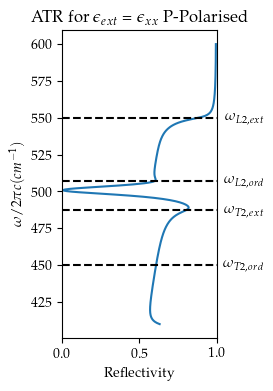

In [71]:
plt.rcParams["figure.figsize"] = (2,4)
plt.plot(our_plot,wavenumber)
plt.xlabel('Reflectivity')
plt.ylabel('$\omega/2\pi c (cm^{-1})$')
plt.xlim(0,1)
plt.title('ATR for $\epsilon_{ext}$ = $\epsilon_{xx}$ P-Polarised')

plt.hlines(450,0,1,'black','dashed')
plt.text(1.3, 450, '$\omega_{T2,ord}$', ha='right', va='center')

plt.hlines(507,0,1,'black','dashed')
plt.text(1.3, 507, '$\omega_{L2,ord}$', ha='right', va='center')

plt.hlines(487.5,0,1,'black','dashed')
plt.text(1.3, 487, '$\omega_{T2,ext}$', ha='right', va='center')

plt.hlines(550,0,1,'black','dashed')
plt.text(1.3, 550, '$\omega_{L2,ext}$', ha='right', va='center')